# Covariance Matrix

A | B
- | -
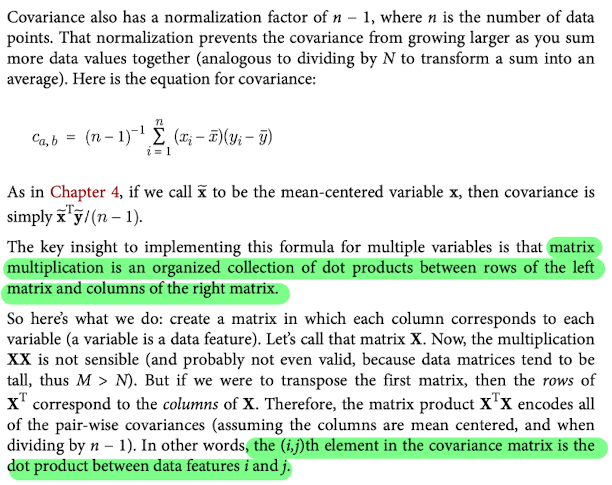|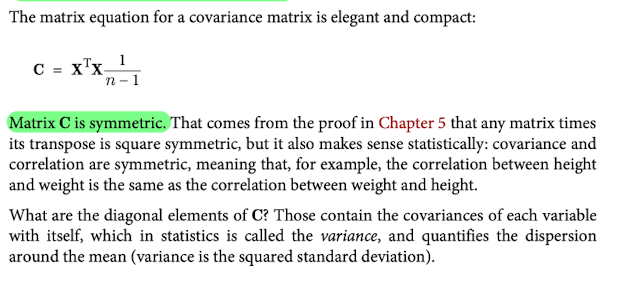

## Input Data

In [1]:
import pandas as pd

# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [34]:
import numpy as np

# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat.shape, dataMat, np.max(dataMat)

#Save to never lookup internet files anymore
np.save('communities-numeric.npy', dataMat)

## Covariance by hand 

In [35]:
# Taking the first two rows from the dataset and computing the covariance

import numpy as np

dataMat = np.load('communities-numeric.npy')

f1 = dataMat[:,0]
var_f1 = np.sum((f1-np.mean(f1))**2)/(len(f1))
print(f1, f1.shape, var_f1, np.var(f1))

f2 = dataMat[:,1]
var_f2 = np.sum((f2-np.mean(f2))**2)/(len(f2))
print(f2, f2.shape, var_f2, np.var(f2))

cov_f1_f2 = np.sum((f1 - np.mean(f1))*(f2 - np.mean(f2)))/(len(f1)-1)


cov_f1_f2, np.cov(f1, f2)

[0.19 0.   0.   ... 0.16 0.08 0.2 ] (1994,) 0.016097013709131407 0.016097013709131407
[0.33 0.16 0.42 ... 0.37 0.51 0.78] (1994,) 0.026789726476319633 0.026789726476319633


(-0.0009588073804957272,
 array([[ 0.01610509, -0.00095881],
        [-0.00095881,  0.02680317]]))

## The formula

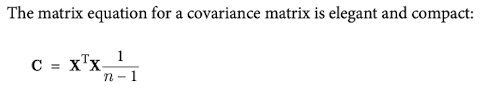

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# compute the mean of each data feature
datamean = np.mean(dataMat,axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# Now to compute the covariance matrix
covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
covMat /= (dataMatM.shape[0]-1) # divide by N-1

print(covMat[0,1], covMat[1,0])

-0.0009588073804957274 -0.0009588073804957274


In [68]:
np.max(covMat), np.min(covMat)

(0.682889914701455, 0.0023582538886101363)

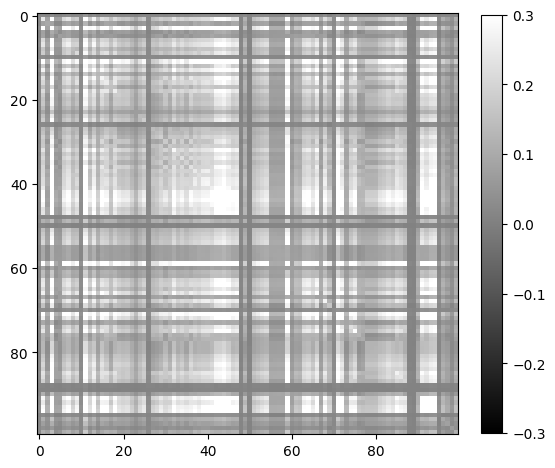

In [65]:
# dynamic color scaling
clim = np.max(np.abs(covMat)) * .4

plt.figure(figsize=(6,6))
plt.imshow(covMat,vmin=-0.3,vmax=0.3, cmap='gray')
plt.colorbar(fraction=.045)
plt.show()

A|B
-|-
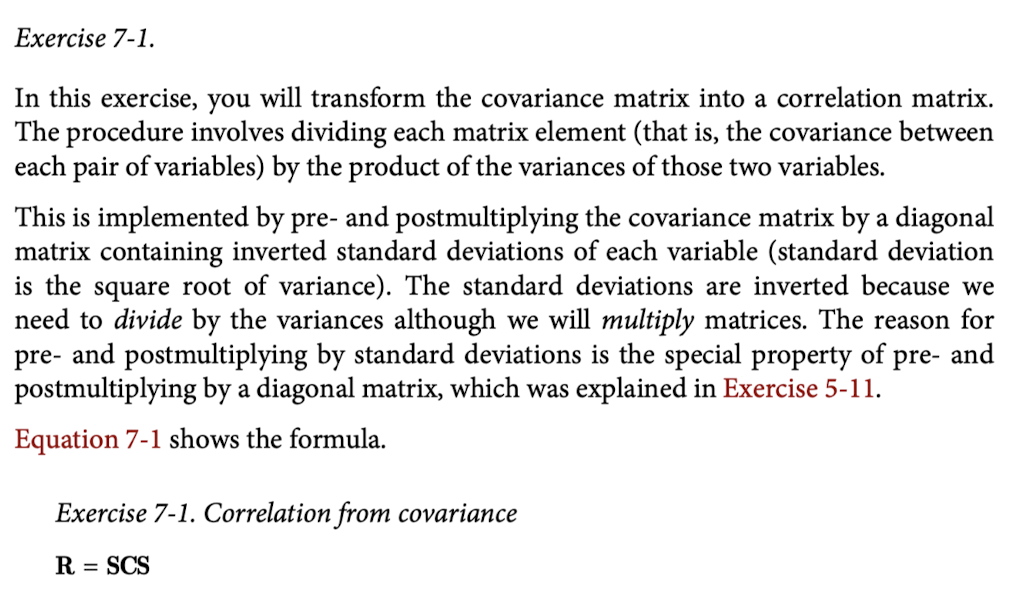| 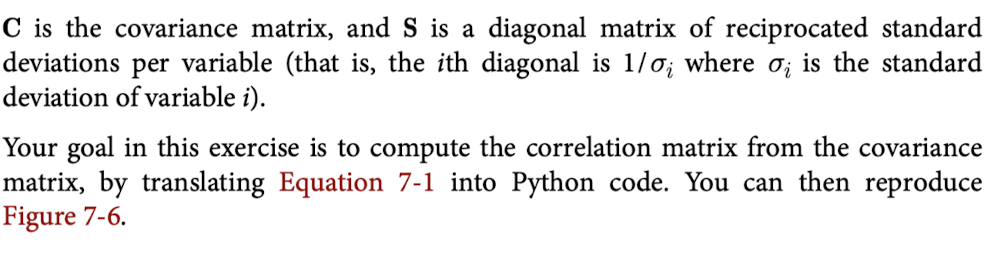

In [50]:
S = np.diag( 1/np.sqrt(np.diag(covMat)) )
corrMat = S @ covMat @ S
corrMat, corrMat.shape, corrMat[2,1], corrMat[1,2]

(array([[1.        , 0.37575103, 0.41078306, ..., 0.43951137, 0.5461017 ,
         0.5292501 ],
        [0.37575103, 1.        , 0.52709368, ..., 0.52983747, 0.31443831,
         0.66571796],
        [0.41078306, 0.52709368, 1.        , ..., 0.43155558, 0.4089297 ,
         0.77353339],
        ...,
        [0.43951137, 0.52983747, 0.43155558, ..., 1.        , 0.3674372 ,
         0.50009452],
        [0.5461017 , 0.31443831, 0.4089297 , ..., 0.3674372 , 1.        ,
         0.48758086],
        [0.5292501 , 0.66571796, 0.77353339, ..., 0.50009452, 0.48758086,
         1.        ]]),
 (100, 100),
 0.5270936774291186,
 0.5270936774291186)

In [38]:
import numpy as np



stdv = np.sum(mean_centered, axis = 0)
stdv /= dataMat.shape[0]
stdv = np.sqrt(stdv)

diagonal = np.diag(1/stdv)

matcorr = diagonal@covMat@diagonal

covMat = dataMat.T @ dataMat  # data matrix times its transpose
covMat /= (dataMat.shape[0]-1)

variances = np.diag(covMat) # variances are the diagonals of a covariance matrix

print("variances diag", variances, variances.shape)
standard_devs = np.sqrt( variances )
S = np.diag( 1/standard_devs )

corrMat = S @ covMat @ S

print("---> stdv", stdv, stdv.shape)
print("---> standard_devs", standard_devs, standard_devs.shape)
print("--->", stdv-standard_devs)


stdv, stdv.shape, diagonal, diagonal.shape, covMat, covMat.shape, matcorr, corrMat - matcorr

centered-> [[ 0.13240722 -0.13339519 -0.15962889 ...  0.03831494  0.22594784
  -0.03797894]
 [-0.05759278 -0.30339519 -0.05962889 ...  0.28831494 -0.09405216
   0.43202106]
 [-0.05759278 -0.04339519  0.31037111 ... -0.14168506 -0.09405216
   0.19202106]
 ...
 [ 0.10240722 -0.09339519  0.07037111 ...  0.01831494  0.81594784
  -0.00797894]
 [ 0.02240722  0.04660481 -0.11962889 ...  0.16831494  0.12594784
  -0.04797894]
 [ 0.14240722  0.31660481 -0.03962889 ... -0.11168506  0.90594784
   0.24202106]] (1994, 100)
vari-> [2.38630424e-31 2.09592454e-28 2.01179252e-29 5.93662205e-29
 1.43769900e-30 9.54521695e-31 8.07793567e-30 1.70571449e-29
 4.17307419e-30 3.15544362e-32 4.12783795e-30 1.33317493e-28
 2.65372809e-29 1.02236373e-29 4.49670437e-29 1.33317493e-30
 6.24856723e-29 4.79942975e-29 5.63266408e-29 5.56620255e-29
 1.96931236e-28 3.15544362e-30 3.97664782e-29 9.66354609e-30
 3.64650953e-30 8.59069526e-30 3.33293732e-31 3.15544362e-32
 1.32607518e-29 9.11923206e-30 1.13911515e-29 1.416

/var/folders/gn/p9fqt_3n0xv_1mf68p7g36l00000gn/T/ipykernel_1272/2138417407.py:14: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.sqrt(stdv)


(array([1.56519653e-09,            nan, 4.74278263e-09, 6.21616127e-09,
        2.45219169e-09, 2.21352216e-09,            nan, 4.55107516e-09,
                   nan,            nan,            nan,            nan,
                   nan, 4.00441225e-09, 5.79910547e-09,            nan,
                   nan, 5.89433524e-09,            nan,            nan,
                   nan, 2.98471267e-09,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan, 7.43187462e-09,
                   nan,            nan, 3.05842038e-09,            nan,
                   nan, 4.97203324e-09,            nan,            nan,
                   nan, 5.62362957e-09,            nan, 6.34031940e-09,
                   nan,            nan, 1.20317614e-09, 4.22102114e-09,
        6.87132458e-09, 3.40309604e-09,            nan, 3.920099

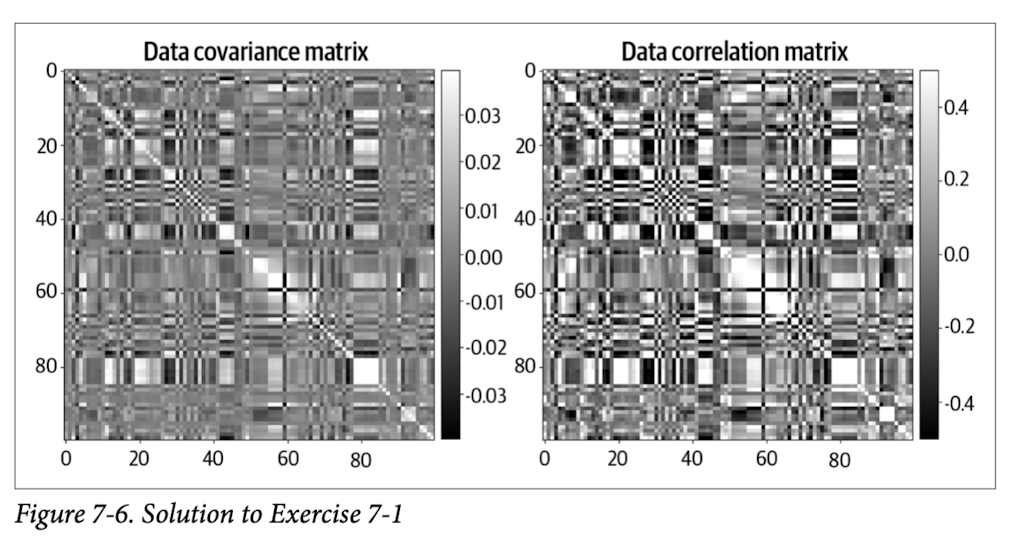